In [1]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import numpy as np
import pandas as pd
import csv
import os
from time import time
import mediapipe as mp
from google.colab.patches import cv2_imshow

In [3]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

Detection for sample image

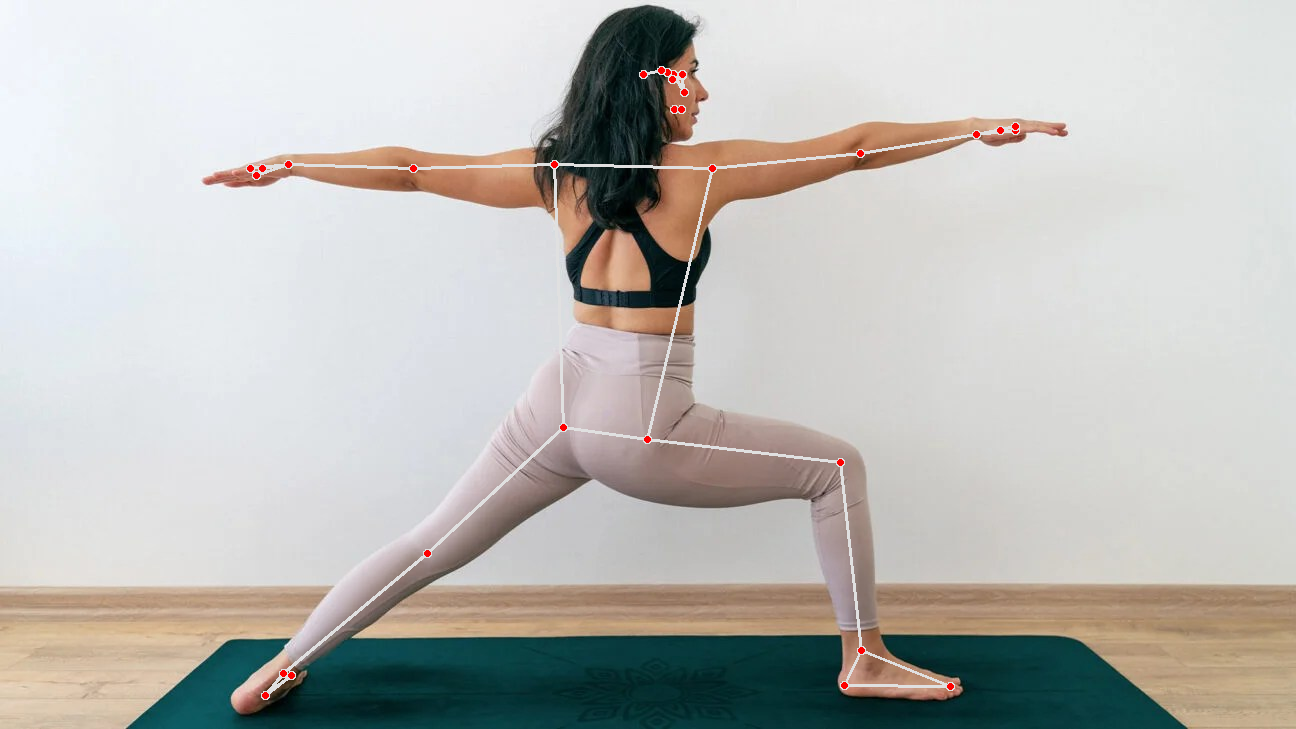

In [ ]:
image = cv2.imread('/content/drive/MyDrive/UGP23/dataset/la.jpg')
# Load the image

# Initialize MediaPipe Pose
pose = mp_pose.Pose(static_image_mode=True,
                    min_detection_confidence=0.5, 
                    model_complexity=2)
    
# Extract key points using MediaPipe Pose
results = pose.process(image)

# Concatenate key point values into numpy array
if results.pose_landmarks is not None:
    pose_landmarks = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] 
        for landmark in results.pose_landmarks.landmark]).flatten()
else:
    pose_landmarks = np.zeros(33*4)
    
# Display the image with pose landmarks
mp_drawing.draw_landmarks(
    image, 
    results.pose_landmarks, 
    mp_pose.POSE_CONNECTIONS)

cv2_imshow(image)
# cv2.imwrite("name.png",image)

In [ ]:
print(pose_landmarks)

[ 0.52793252  0.12678123  0.07388512  0.9999516   0.51931196  0.10159692
  0.06392192  0.99997711  0.51484215  0.09902553  0.06355976  0.99998224
  0.51063865  0.09707108  0.06371605  0.9999845   0.52564174  0.10383546
  0.04418915  0.99997842  0.52629048  0.10316542  0.04382623  0.99998605
  0.52698851  0.10249612  0.04369335  0.99998307  0.49623004  0.10224578
  0.04872623  0.99999011  0.51884699  0.10911739 -0.03835239  0.99996173
  0.52042061  0.15038574  0.08147297  0.99984372  0.52568156  0.15070483
  0.05306923  0.99975806  0.42812195  0.22517073  0.07744555  0.99976891
  0.54964644  0.2306731  -0.07749499  0.99955291  0.31937039  0.2309207
  0.13887583  0.9649142   0.66372108  0.210209   -0.1126133   0.99556547
  0.22237203  0.2253814   0.17359456  0.87949163  0.75380218  0.18499926
 -0.08407406  0.97358781  0.19770238  0.24130791  0.16185479  0.83916759
  0.78337812  0.17925005 -0.12375814  0.96528482  0.19315171  0.23163849
  0.1601128   0.8253299   0.78350317  0.1741266  -0.

In [ ]:
!unzip /content/drive/MyDrive/UGP23/dataset/yoga_82_final.zip -d /content/drive/MyDrive/UGP23/dataset

Archive:  /content/drive/MyDrive/UGP23/dataset/yoga_82_final.zip
   creating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/
  inflating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/0-0.png  
  inflating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/0-1.png  
  inflating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/1_0_523.jpg  
  inflating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/1_0_581.jpg  
  inflating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/1_0_64.jpg  
  inflating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/1_0_96.jpg  
  inflating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/1_101.jpg  
  inflating: /content/drive/MyDrive/UGP23/dataset/yoga_82_final/Cat_Cow_Pose_or_Marjaryasana_/1_

Extract Keypoints


In [4]:
folder_path = '/content/drive/MyDrive/UGP23/dataset/yoga_82_final/yoga_82_final'

In [5]:
new_folder_path = '/content/drive/MyDrive/UGP23/dataset/yoga_82_final/yoga_82_final_detect'

In [6]:
# Initialize MediaPipe Pose
with mp_pose.Pose(static_image_mode=True,
                    min_detection_confidence=0.5,
                    model_complexity=2) as pose:
    # Create a list to store the pose landmarks and labels
    pose_landmarks_list = []
    labels = []
    file_name = []

    # Loop through all subfolders in the "train" folder
    for dirpath, dirnames, filenames in os.walk(folder_path):
        # Loop through all image files in each subfolder
        for filename in filenames:
            # Load the image
            image_path = os.path.join(dirpath, filename)
            image = cv2.imread(image_path)

            if image is None:
              continue

            # Extract the label from the folder name
            label = os.path.basename(dirpath)

            # Extract key points using MediaPipe Pose
            results = pose.process(image)

            # Concatenate key point values into numpy array
            if results.pose_landmarks is not None and results.pose_landmarks.landmark is not None:
                pose_landmarks = np.array([[landmark.x, 
                                            landmark.y, 
                                            # landmark.z, 
                                            landmark.visibility] 
                                           for landmark in results.pose_landmarks.landmark]).flatten()
            else:
                pose_landmarks = np.zeros(33*3)

            # Append the pose landmarks and label to the list
            pose_landmarks_list.append(pose_landmarks)
            labels.append(label)
            file_name.append(filename)

            # Draw landmarks on the image
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(annotated_image, 
                                      results.pose_landmarks, 
                                      mp_pose.POSE_CONNECTIONS)

            # Save the image with landmarks
            pose_folder_path = os.path.join(new_folder_path, label)
            os.makedirs(pose_folder_path, exist_ok=True)
            new_image_path = os.path.join(pose_folder_path, filename)
            cv2.imwrite(new_image_path, annotated_image)


    # Save the pose landmarks and labels to a CSV file
    names_parts = {}           # Create the dictionary for header
    names_parts['file_name'] = ''
    names_parts['labels'] = ''
    for i in range(33):
        names_parts[mp_pose.PoseLandmark(i).name+'_x'] = ''
        names_parts[mp_pose.PoseLandmark(i).name+'_y'] = ''
        names_parts[mp_pose.PoseLandmark(i).name+'_score'] = ''
    header = list(names_parts)
    with open('/content/drive/MyDrive/UGP23/dataset/yoga_82_final/yoga_82_final/keypoints_yoga82.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        for i in range(len(pose_landmarks_list)):
            row = [file_name[i], labels[i]] + pose_landmarks_list[i].tolist()
            writer.writerow(row)